# Pointwise Mutual Information

## Step 1

In [30]:
import re
from typing import List, Tuple, Dict
from collections import Counter
import nltk
from nltk.corpus import brown
from numpy import log


words = brown.words()
unigram_counter = Counter(words)
def get_pmi(sents: List[List[str]], words: List[str]) -> Tuple[Counter[str], Counter[str]]:
    bigrams = [(sent[i], sent[i + 1])  for sent in sents for i in range(len(sent) - 1)]
    bigram_counter = Counter(bigrams)
    corpus_size = len(words)

    bigram2pmi = Counter()
    bigram2neg_pmi = Counter()

    for w1, w2 in bigrams:
        bigram_freq = bigram_counter[(w1, w2)]
        w1_freq = unigram_counter[w1]
        w2_freq = unigram_counter[w2]
        bigram2pmi[(w1, w2)] = log(corpus_size * bigram_freq/(w1_freq * w2_freq)) if (w1_freq > 10) and (w2_freq > 10) else 0
        bigram2neg_pmi[(w1, w2)] = -log(corpus_size * bigram_freq/(w1_freq * w2_freq)) if (w1_freq > 10) and (w2_freq > 10) else 0
    return bigram2pmi, bigram2neg_pmi, bigrams, bigram_counter
        
bigram2pmi, bigram2neg_pmi, bigrams, bigram_counter = get_pmi(brown.sents(), brown.words())
print(bigram2pmi.most_common(20))
print(bigram2neg_pmi.most_common(20))


[(('Hong', 'Kong'), 11.567062348885775), (('Viet', 'Nam'), 11.192368899444366), (('Simms', 'Purdew'), 11.13174427762793), (('Herald', 'Tribune'), 10.948023140479552), (('Lo', 'Shu'), 10.920435183960723), (('WTV', 'antigen'), 10.861011763489923), (('Puerto', 'Rico'), 10.7869037913362), (('Internal', 'Revenue'), 10.7869037913362), (('Saxon', 'Shore'), 10.615053534409542), (('Export-Import', 'Bank'), 10.597661791697673), (('carbon', 'tetrachloride'), 10.578685890238667), (('Common', 'Market'), 10.563760240021992), (('unwed', 'mothers'), 10.563760240021992), (('Beverly', 'Hills'), 10.552710403835407), (('Kohnstamm', 'reactivity'), 10.535010826736006), (('Half', 'Moon'), 10.468450060217666), (('peaceful', 'coexistence'), 10.42762806569741), (('Armed', 'Forces'), 10.39286737905166), (('Willie', 'Mays'), 10.38840735254413), (('Virgin', 'Islands'), 10.381438683228037)]
[(('the', '.'), 7.887978407847269), (('the', ','), 7.362159632152464), (('and', '.'), 7.0785738239388385), (('of', 'of'), 7.02

In [31]:
for bigram, _ in bigram2neg_pmi.most_common(20):
    print(bigram, ' '.join(words[bigrams.index(bigram) - 10: bigrams.index(bigram) + 10]))
print(unigram_counter.most_common(10))

('the', '.') men posted a few hundred yards away in the windless shelter of the trees . The two men whipped their
('the', ',') , the Yale athlete whose sobriquet was `` the father of American football '' . He was placed in charge
('and', '.') you are taking things too seriously and had better stop ! ! Or a bored dog because you are more
('of', 'of') the meanings of number and chimney make it clear that up is syntactically a second complement in the first sentence
('the', 'in') that they will leave administrative matters to the administration . How well do faculty members govern themselves ? ? There
('the', 'and') Wayne State . But Holmes was rejected again `` on the basis of his record and interview '' . The
('and', 'and') house he had ever been in , almost the largest building , except for a hotel . He had no
('the', 'is') deals with differential equations and thus is not purely linear algebra . Example 11 . In the primary decomposition theorem
('of', 'to') are well chosen , they will

Those bigram with high PMI are usually proper nouns, names and collocations. One of the intuitive ways to understand PMI is how confident you can guess the seconde word when seeing the first.  In these cases, the sencond words are highly binded with the first one. For example it is very unlikely to be other words like 'and' but 'Nam' after the word 'Viet', though 'and' is much more common than 'Nam'.

Those bigrams with low PMI are mostly erros in the corpus but sometimes they are just used uncommon way. The words appear in the bigram are usually high frequency words. For example, '... sighs and and noise" is a redundant erro. In "All Charlie could look forward to was a yellow ...', 'to' and 'was' appear together but they actually belong to clause and the main sentence so they are not closely related. 

## Step 2

From the plot above, we can see more than half of the words in the bigrams have positive PMI value.
That's to say, independent assumption is too strong.
And as stated above proper nouns and names can be expressed by two or more words but semantically closely binded.
For example 'Hong' and 'Kong' don't really have a meaning in English when used separately but only appear together.
If 'Hong' has already been seen, 'Kong' almost must appear immediately after.
And in certain fields, common expressions exist, for example, in economy a 'common market' is more likely than the word 'common people'.

## Step 3

In [40]:
from nltk.tokenize import word_tokenize, sent_tokenize
bigram2ppmi = Counter()
bigram2ppmi_100 = Counter()

for bigram in bigram2pmi:
    bigram2ppmi[bigram] = bigram2pmi[bigram] if  bigram2pmi[bigram] > 0 else 0

sents_100 = []
words_100 = []
with open('brown_100.txt') as f:
    for line in f.readlines():
        line = line.strip().removeprefix('<s>').removesuffix('</s>')
        line_tokens = word_tokenize(line)
        sents_100.append(line_tokens)
        words_100.extend(line_tokens)
        
bigram2pmi_100, bigram2neg_pmi_100, _, _ = get_pmi(sents_100, words_100)
for bigram in bigram2pmi_100:
    bigram2ppmi_100[bigram] = bigram2pmi_100[bigram] if  bigram2pmi_100[bigram] > 0 else 0
    
print(bigram2ppmi.most_common(20))
print(bigram2ppmi_100.most_common(20))
print(bigram2neg_pmi_100.most_common(20))

[(('Hong', 'Kong'), 11.567062348885775), (('Viet', 'Nam'), 11.192368899444366), (('Simms', 'Purdew'), 11.13174427762793), (('Herald', 'Tribune'), 10.948023140479552), (('Lo', 'Shu'), 10.920435183960723), (('WTV', 'antigen'), 10.861011763489923), (('Puerto', 'Rico'), 10.7869037913362), (('Internal', 'Revenue'), 10.7869037913362), (('Saxon', 'Shore'), 10.615053534409542), (('Export-Import', 'Bank'), 10.597661791697673), (('carbon', 'tetrachloride'), 10.578685890238667), (('Common', 'Market'), 10.563760240021992), (('unwed', 'mothers'), 10.563760240021992), (('Beverly', 'Hills'), 10.552710403835407), (('Kohnstamm', 'reactivity'), 10.535010826736006), (('Half', 'Moon'), 10.468450060217666), (('peaceful', 'coexistence'), 10.42762806569741), (('Armed', 'Forces'), 10.39286737905166), (('Willie', 'Mays'), 10.38840735254413), (('Virgin', 'Islands'), 10.381438683228037)]
[(('Fulton', 'Superior'), 2.828878703545776), (('Fulton', 'legislators'), 2.828878703545776), (('congressional', 'delegation')

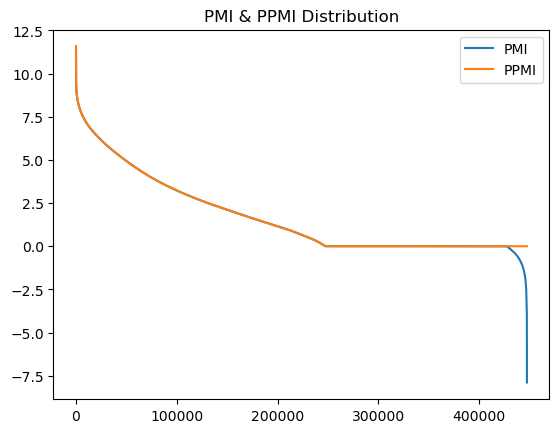

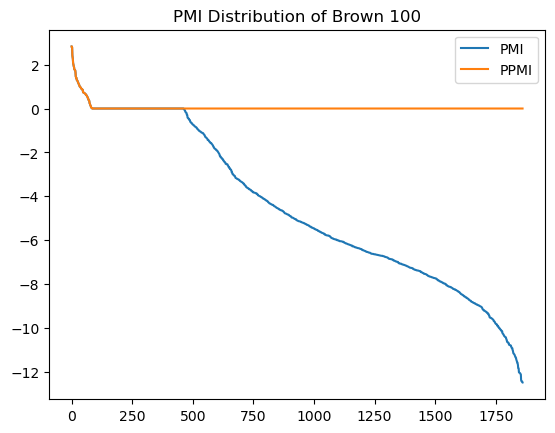

In [39]:
from matplotlib import pyplot as plt

_, pmi = zip(*bigram2pmi.most_common(len(bigram_counter)))
_, pmi_100 = zip(*bigram2pmi_100.most_common(len(bigram2pmi_100)))
_, ppmi = zip(*bigram2ppmi.most_common(len(bigram2ppmi)))
_, ppmi_100 = zip(*bigram2ppmi_100.most_common(len(bigram2ppmi_100)))

plt.title("PMI & PPMI Distribution")
plt.plot(pmi, label="PMI")
plt.plot(ppmi, label="PPMI")
plt.legend()
plt.show()

plt.title("PMI Distribution of Brown 100")
plt.plot(pmi_100, label="PMI")
plt.plot(ppmi_100, label="PPMI")
plt.legend()
plt.show()

In the whole corpus the association between two words in a bigram are stronger.
There are more pairs with higher PMI/PPMI value in the whole corpus and the maximum PMI/PPMI are higher.
This suggests a different word distribution between the whole corpus and brown_100.txt.

## Step 4

PPMI and PMI only differs when the PMI is negative.
By setting the negative values to zero, PPMI avoid an accidental bigram(possibly erro) to influence the downstream tasks.
It is also harder to interpret and utilize the negative values in the downstream tasks.

As we spotted in step 1, bigrams with negative PMI, for example, the bigram ('and', 'and') is an erro instead of a meaningful sentence structure.
It might make sense to forbid these kind of structure to be generated in the downstream tasks.
However, this leads to another problem that bigrams like ('to', 'was') is unlikely to appear but possible in a sentence.
Setting their PMI all to zero will just treat them like independent word, allowing a lower but non-zero probability.  